Analysis of which ratings category generates the most revenue

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the raw data from CSV files into a pandas DataFrames
PAYMENT_FILE_PATH = "../../data/raw/payment.csv"
RENTAL_FILE_PATH = "../../data/raw/rental.csv"
INVENTORY_FILE_PATH = "../../data/raw/inventory.csv"
FILM_FILE_PATH = "../../data/raw/film.csv"
payment_df = pd.read_csv(PAYMENT_FILE_PATH)
rental_df = pd.read_csv(RENTAL_FILE_PATH)
inventory_df = pd.read_csv(INVENTORY_FILE_PATH)
film_df = pd.read_csv(FILM_FILE_PATH)

In [3]:
# Drop unnecessary columns to optimize memory usage
payment_df = payment_df[['rental_id', 'amount']]
rental_df = rental_df[['rental_id', 'inventory_id']]
inventory_df = inventory_df[['inventory_id', 'film_id']]
film_df = film_df[['film_id', 'rating']]

# Make the 'rating' column categorical to save memory
film_df['rating'] = film_df['rating'].astype('category')
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   film_id  1000 non-null   int64   
 1   rating   1000 non-null   category
dtypes: category(1), int64(1)
memory usage: 9.1 KB


In [4]:
# Merge the DataFrames to associate payments with film ratings
merged_df = (
    payment_df.merge(rental_df, left_on="rental_id", right_on="rental_id")
    .merge(inventory_df, left_on="inventory_id", right_on="inventory_id")
    .merge(film_df, left_on="film_id", right_on="film_id")
)
merged_df.head()

,rental_id,amount,inventory_id,film_id,rating
0,1520,7.99,3419,749,R
1,1778,1.99,2512,552,PG
2,1849,7.99,2507,551,PG
3,2829,2.99,2047,445,G
4,3130,7.99,2569,563,R


In [5]:
# Calculate total revenue per film rating
revenue_by_rating = merged_df.groupby('rating')['amount'].sum().reset_index()
revenue_by_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rating  5 non-null      category
 1   amount  5 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 389.0 bytes


C:\Users\ojeri\AppData\Local\Temp\ipykernel_26324\1284385428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating = merged_df.groupby('rating')['amount'].sum().reset_index()


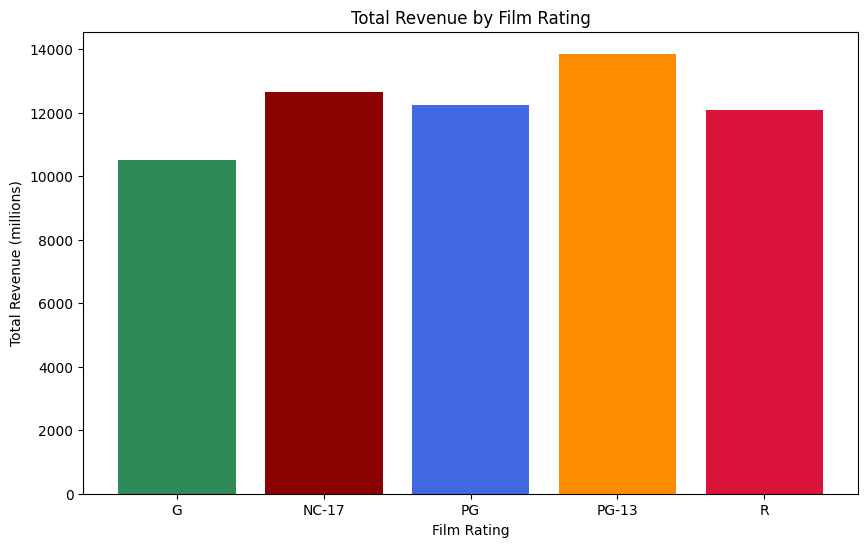

In [6]:
# Define colors for each rating
rating_colors = {
    "G": "#2E8B57",  # Sea Green (family-friendly)
    "PG": "#4169E1",  # Royal Blue (general audience)
    "PG-13": "#FF8C00",  # Dark Orange (teen audience)
    "R": "#DC143C",  # Crimson (mature audience)
    "NC-17": "#8B0000",  # Dark Red (adult only)
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(
    revenue_by_rating["rating"], revenue_by_rating["amount"], color=[rating_colors[rating] for rating in revenue_by_rating["rating"]]
)
plt.xlabel("Film Rating")
plt.ylabel("Total Revenue (millions)")
plt.title("Total Revenue by Film Rating")
plt.show()

In [7]:
# Save the monthly revenue data to a new CSV file
OUTPUT_FILE_PATH = '../../data/processed/revenue_by_rating.csv'
revenue_by_rating.to_csv(OUTPUT_FILE_PATH, index=False)